In [7]:
from seirsplus.networks import generate_demographic_contact_network

In [18]:
household_data = {
                   'age_distn':{'0-9': 0.121, '10-19': 0.131, '20-29': 0.137, '30-39': 0.133, '40-49': 0.124, '50-59': 0.131, '60-69': 0.115, '70-79': 0.070, '80+'  : 0.038  },
                   'household_size_distn':{ 1: 0.284, 2: 0.345, 3: 0.150, 4: 0.128, 5: 0.058, 6: 0.023, 7: 0.012 },
                   'household_stats':{ 'pct_with_under20': 0.337,                      # percent of households with at least one member under 60
                                       'pct_with_over60': 0.380,                       # percent of households with at least one member over 60
                                       'pct_with_under20_over60':  0.034,              # percent of households with at least one member under 20 and at least one member over 60
                                       'pct_with_over60_givenSingleOccupant': 0.110,   # percent of households with a single-occupant that is over 60
                                       'mean_num_under20_givenAtLeastOneUnder20': 1.91 # number of people under 20 in households with at least one member under 20
                                     }
                 }

In [21]:
age_distn_given20to60 = {}
for k,v in household_data['age_distn'].items():
    if "+" in k:
        continue
    f,t = list(map(int, k.split("-")))
    if f < 20 or f >= 60:
        continue
    age_distn_given20to60[k] = v
    
tot = sum(age_distn_given20to60.values())

for k,v in age_distn_given20to60.items():
    age_distn_given20to60[k] = age_distn_given20to60[k] / tot
    
age_distn_given20to60 = household_data['age_distn']

layer_info  = { '0-9':   {'ageBrackets': ['0-9'],   'meanDegree': 8.6,  'meanDegree_CI': (0.0, 17.7) },
                '10-19': {'ageBrackets': ['10-19'], 'meanDegree': 16.2, 'meanDegree_CI': (12.5, 19.8) },
                '20-59': {'ageBrackets': ['20-29', '30-39', '40-49', '50-59'], 'meanDegree': ((age_distn_given20to60['20-29']+age_distn_given20to60['30-39'])*15.3 + (age_distn_given20to60['40-49']+age_distn_given20to60['50-59'])*13.8), 'meanDegree_CI': ( ((age_distn_given20to60['20-29']+age_distn_given20to60['30-39'])*12.6 + (age_distn_given20to60['40-49']+age_distn_given20to60['50-59'])*11.0), ((age_distn_given20to60['20-29']+age_distn_given20to60['30-39'])*17.9 + (age_distn_given20to60['40-49']+age_distn_given20to60['50-59'])*16.6) ) },
                '60+':   {'ageBrackets': ['60-69', '70-79', '80+'], 'meanDegree': 13.9, 'meanDegree_CI': (7.3, 20.5) } }

In [19]:
sum(household_data['household_size_distn'].values())

1.0

In [22]:
graphs, labels, households = generate_demographic_contact_network(
    2000, 
    demographic_data=household_data, 
    layer_generator='LFR', 
    layer_info=layer_info, 
    distancing_scales=[], 
    isolation_groups=[]
)

Generated overall age distribution:
0-9: 0.0970	(-0.0240 from target)
10-19: 0.1305	(-0.0005 from target)
20-29: 0.1360	(-0.0010 from target)
30-39: 0.1520	(0.0190 from target)
40-49: 0.1255	(0.0015 from target)
50-59: 0.1265	(-0.0045 from target)
60-69: 0.1095	(-0.0055 from target)
70-79: 0.0795	(0.0095 from target)
80+: 0.0435	(0.0055 from target)

Generated household size distribution:
1: 0.2894	(0.0054 from target)
2: 0.3443	(-0.0007 from target)
3: 0.1453	(-0.0047 from target)
4: 0.1209	(-0.0071 from target)
5: 0.0647	(0.0067 from target)
6: 0.0269	(0.0039 from target)
7: 0.0085	(-0.0035 from target)
Num households: 819
mean household size: 2.448

Generating graph for 0-9...
Generating graph for 10-19...
Generating graph for 20-59...
Generating graph for 60+...


In [30]:
large_component = nx.subgraph(graphs['baseline'], list(nx.connected_components(graphs['baseline']))[0])

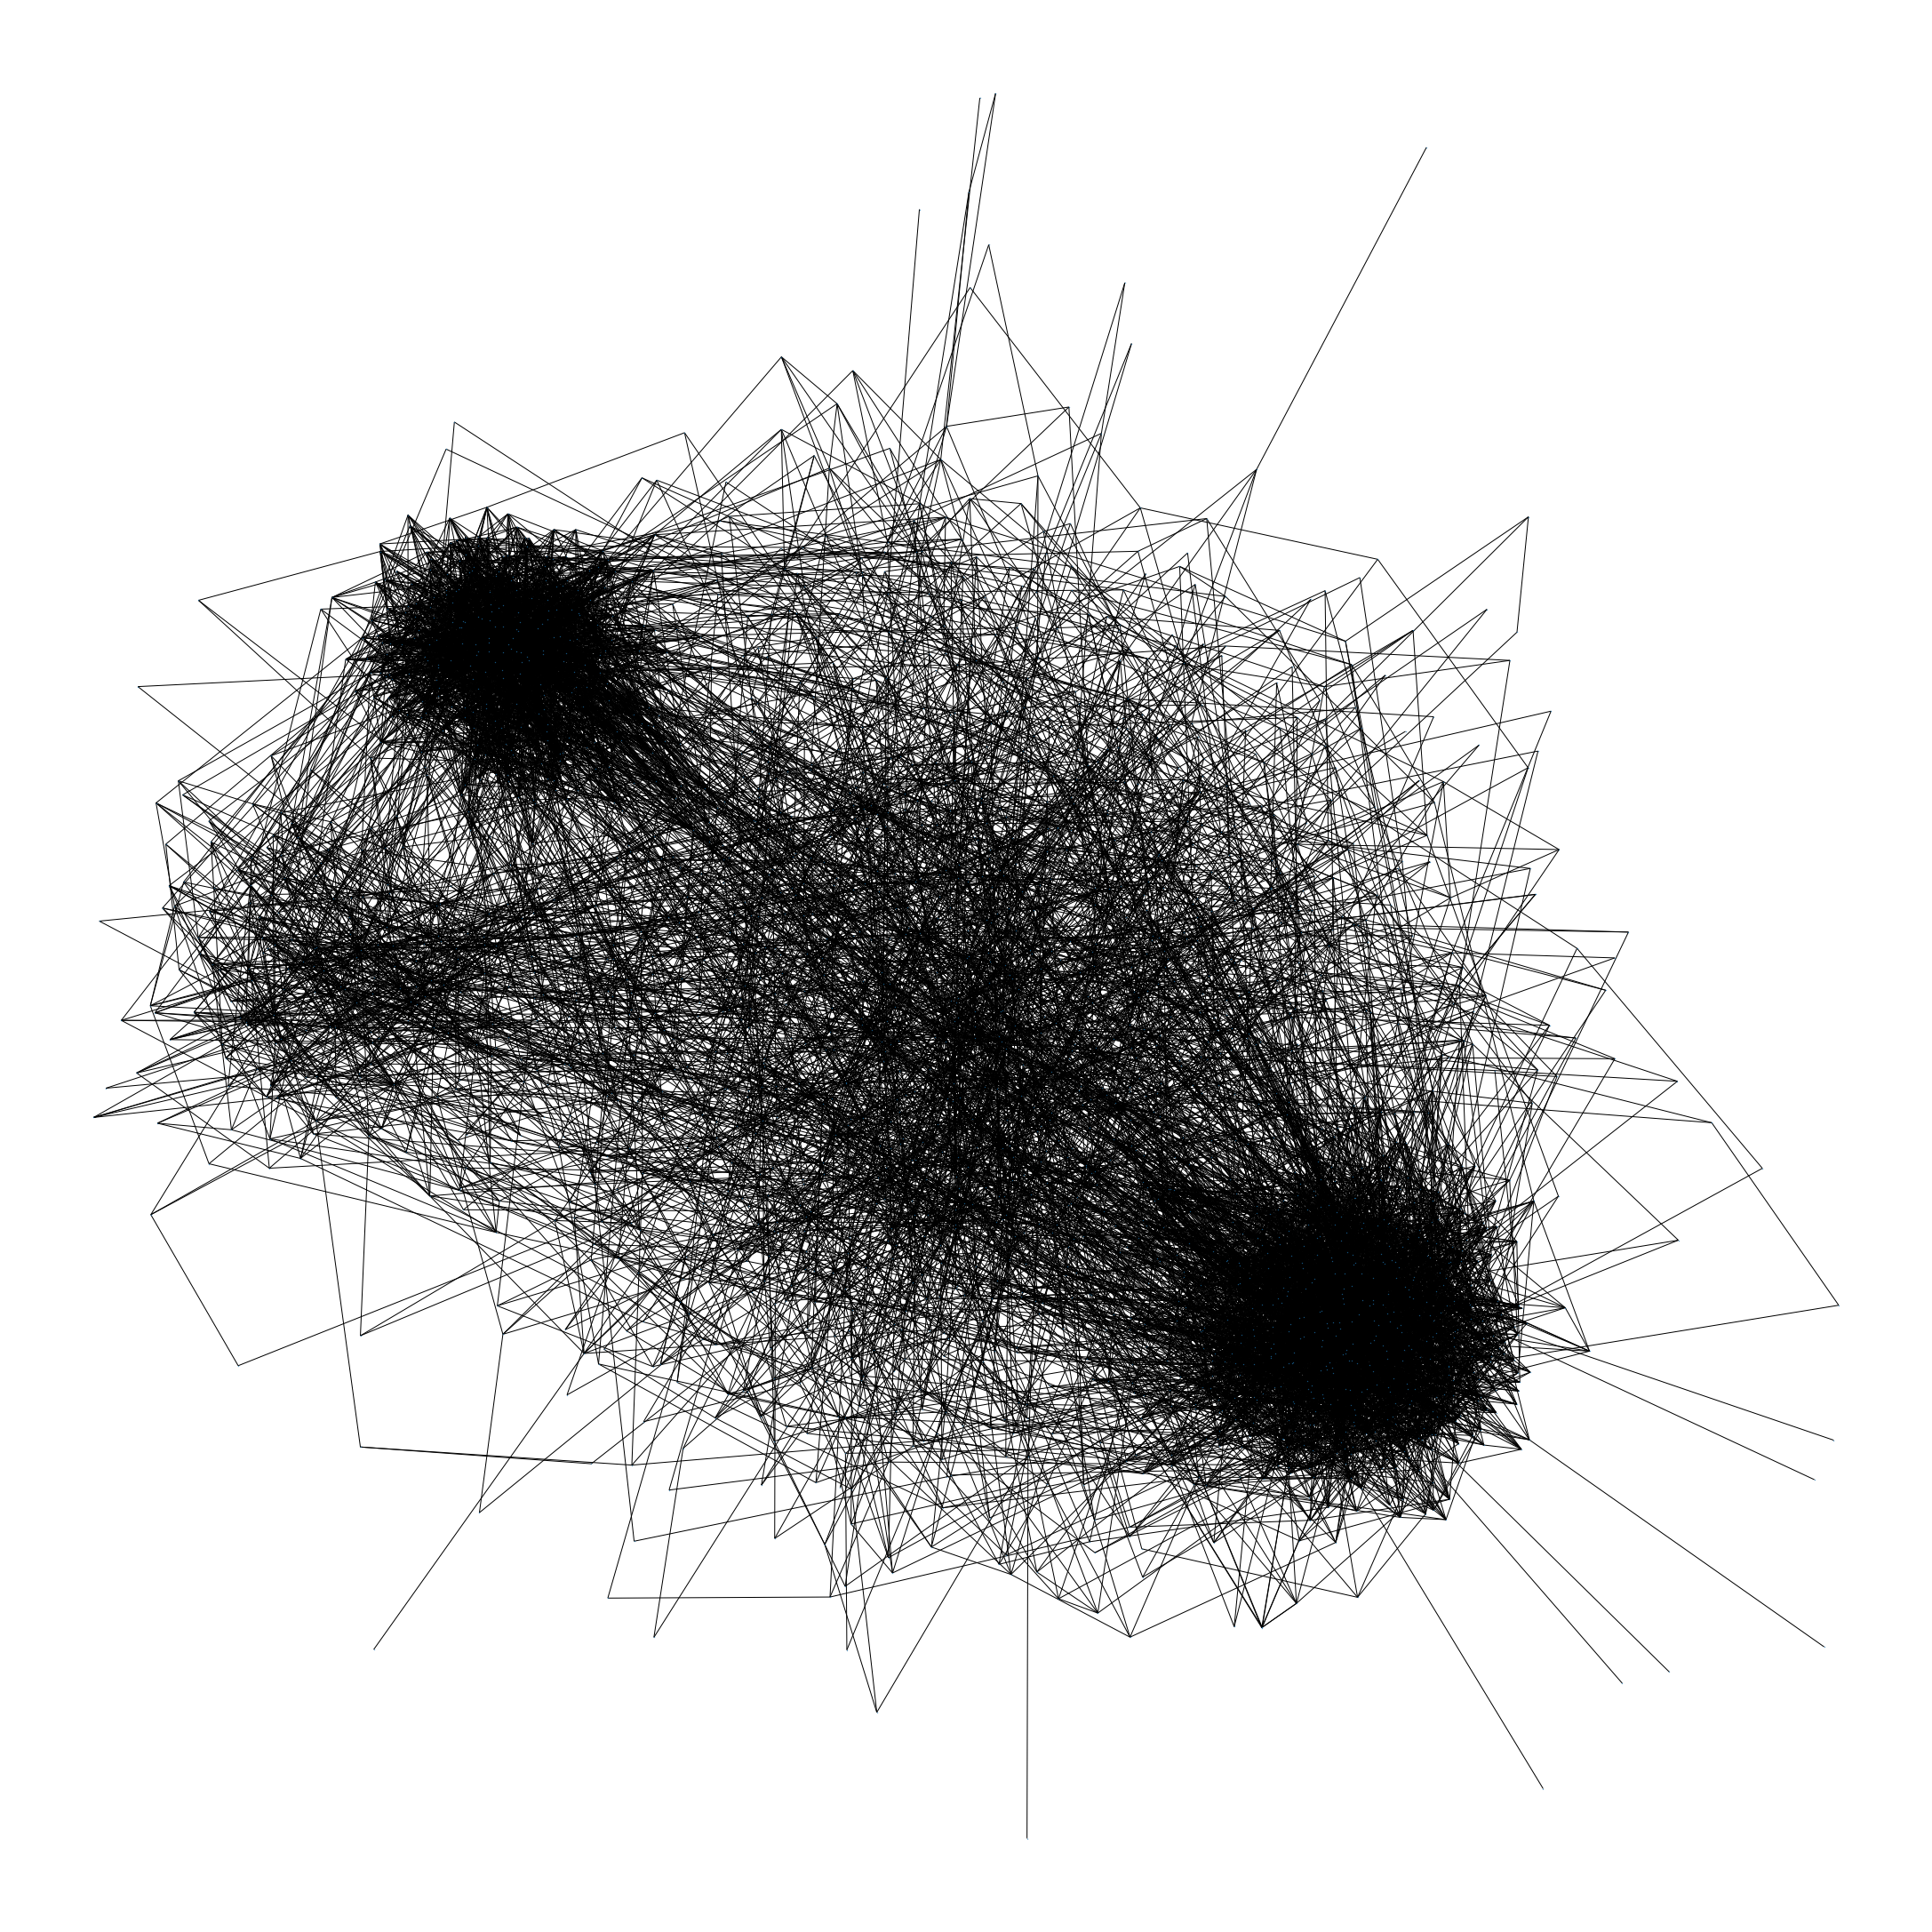

In [32]:
import networkx as nx 
from matplotlib import pyplot as plt
plt.figure(figsize=(30,30))
nx.draw(large_component, node_size=0.1)